## Importing The Necessary Libraries

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib

# Data Wrangling

In [56]:
data = pd.read_csv('Data.csv')

In [57]:
df = pd.DataFrame(data)

## Renaming Columns for Readability

In [58]:
df.rename(columns={'1' : 'Initial payment', '2' : 'Last payment', '3':'Credit score', '4':'House number', 'Unnamed: 5':'Result'}, inplace=True)

In [5]:
df.head()

,Initial payment,Last payment,Credit score,House number,sum,Result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes


In [33]:
# df.drop(columns='sum', axis=1, inplace = True)

In [6]:
df.describe()

,Initial payment,Last payment,Credit score,House number,sum
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000
mean,294.34300,12465.88400,528.042000,4027.011000,17315.280000
std,115.81539,1440.15617,259.796059,565.164179,1589.943875
min,100.00000,10005.00000,100.000000,3003.000000,13515.000000
25%,195.00000,11201.50000,302.000000,3545.000000,16073.750000
50%,289.50000,12450.00000,516.500000,4041.500000,17383.000000
75%,398.00000,13678.25000,753.500000,4507.000000,18595.250000
max,500.00000,14996.00000,997.000000,5000.000000,20737.000000


In [7]:
df.isnull().sum()

Initial payment    0
Last payment       0
Credit score       0
House number       0
sum                0
Result             0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Initial payment  1000 non-null   int64 
 1   Last payment     1000 non-null   int64 
 2   Credit score     1000 non-null   int64 
 3   House number     1000 non-null   int64 
 4   sum              1000 non-null   int64 
 5   Result           1000 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.0+ KB


## Encoding The "Result" column


In [59]:
df['Result'].unique()

array(['yes', 'No'], dtype=object)

In [60]:
df['Result'] = df['Result'].replace('yes', 1)
df['Result'] = df['Result'].replace('No', 0)

In [63]:
df['Result']

0      1
1      1
2      1
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Result, Length: 1000, dtype: int64

## Selecting The Features And target Variable


In [64]:
X = df.drop('Result', axis=1).copy()
y = df[['Result']].copy()

## Data Exploration

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


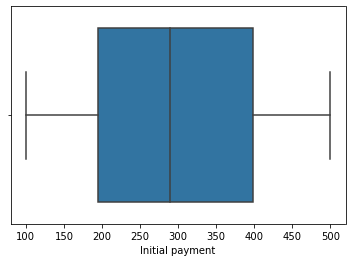

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


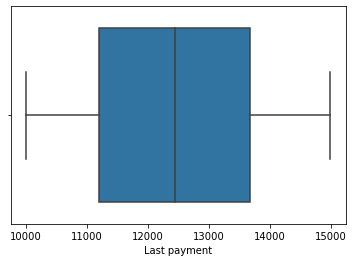

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


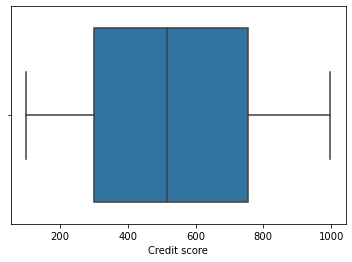

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


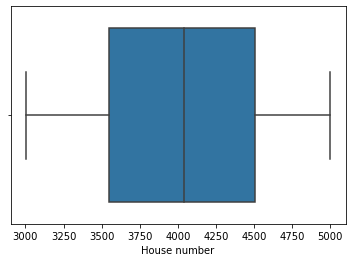

C:\Users\habee\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


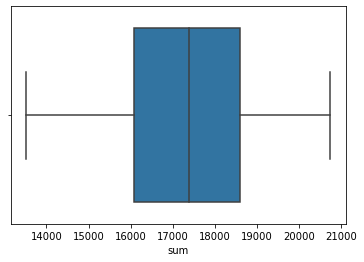

In [65]:
for cols in X.columns:
    sns.boxplot(X[cols])
    plt.show()

## Splitting the Data Into Training And Testing Set

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [67]:
X_train.shape, X_test.shape

((700, 5), (300, 5))

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 924 to 960
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Initial payment  700 non-null    int64
 1   Last payment     700 non-null    int64
 2   Credit score     700 non-null    int64
 3   House number     700 non-null    int64
 4   sum              700 non-null    int64
dtypes: int64(5)
memory usage: 32.8 KB


In [69]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 924 to 960
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Result  700 non-null    int64
dtypes: int64(1)
memory usage: 10.9 KB


## Building Model Using RandomforestClassifier

In [70]:
classifier = RandomForestClassifier()

In [71]:
classifier.fit(X_train, y_train)

<ipython-input-71-f44724590846>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train, y_train)


RandomForestClassifier()

## Model Evaluation

In [73]:
X_test_predictions = classifier.predict(X_test)

In [74]:
accuracy_score(y_test, X_test_predictions)

1.0

In [79]:
cf = confusion_matrix(y_test, X_test_predictions)

In [80]:
cf

array([[185,   0],
       [  0, 115]], dtype=int64)

In [78]:
print(classification_report(y_test, X_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



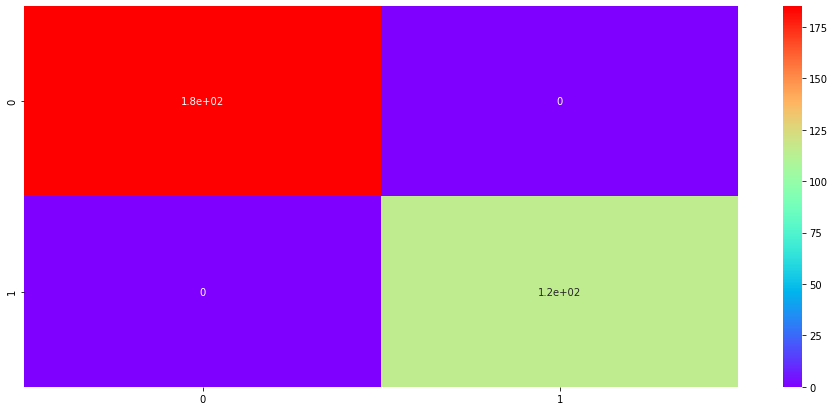

In [82]:
fig, ax = plt.subplots(figsize=(16,7))
sns.heatmap(cf, annot=True, cmap='rainbow')
plt.show()

In [83]:
X_train_predictions = classifier.predict(X_train)

In [84]:
accuracy_score(X_train_predictions, y_train)

1.0

In [88]:
cf_t= confusion_matrix(X_train_predictions, y_train)

In [89]:
cf_t

array([[336,   0],
       [  0, 364]], dtype=int64)

In [90]:
print(classification_report(y_test, X_test_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       185
           1       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



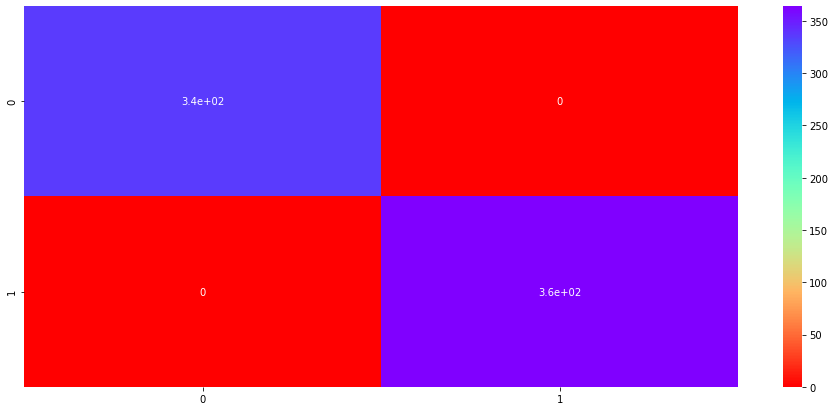

In [91]:
fig, ax = plt.subplots(figsize=(16,7))
sns.heatmap(cf_t, annot=True, cmap='rainbow_r')
plt.show()

## Saving The Model into .pkl file

In [96]:
joblib.dump(classifier, 'Loan_issuance_Classification.pkl')

['Loan_issuance_Classification.pkl']

In [97]:
joblib.load('Loan_issuance_Classification.pkl')

RandomForestClassifier()